# Numerical Integration of ODEs Using SciPy

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from scipy import integrate
import sympy

# For nicely displayed output from SymPy, we need to initialize its printing system
sympy.init_printing()

In [2]:
def plot_direction_field(x, y_x, f_xy, x_lim=(-5, 5), y_lim=(-5, 5), ax=None):
    f_np = sympy.lambdify((x, y_x), f_xy, 'numpy')
    
    # Generate 2 linspace
    x_vec = np.linspace(x_lim[0], x_lim[1], 20)
    y_vec = np.linspace(y_lim[0], y_lim[1], 20)
    
    # Init meshgrid
    X, Y = np.meshgrid(x_vec, y_vec)
    
    if ax is None:
        _, ax = plt.subplots(figsize=(4, 4))
        
    dx = 1
    Dy = f_np(X, Y)
    
    # Normalize arrows - divide by length to get close to unit vectors
    N = np.sqrt(dx**2 + Dy**2)

    # Normalize
    Dy = Dy / N
    Dx = dx / N

    # Use quiver instead of plot
    ax.quiver(X, Y, Dx, Dy, angles="xy")

    ax.set_title(r"$%s$" % (sympy.latex(sympy.Eq(y(x).diff(x), f_xy))), fontsize=18)
    return ax

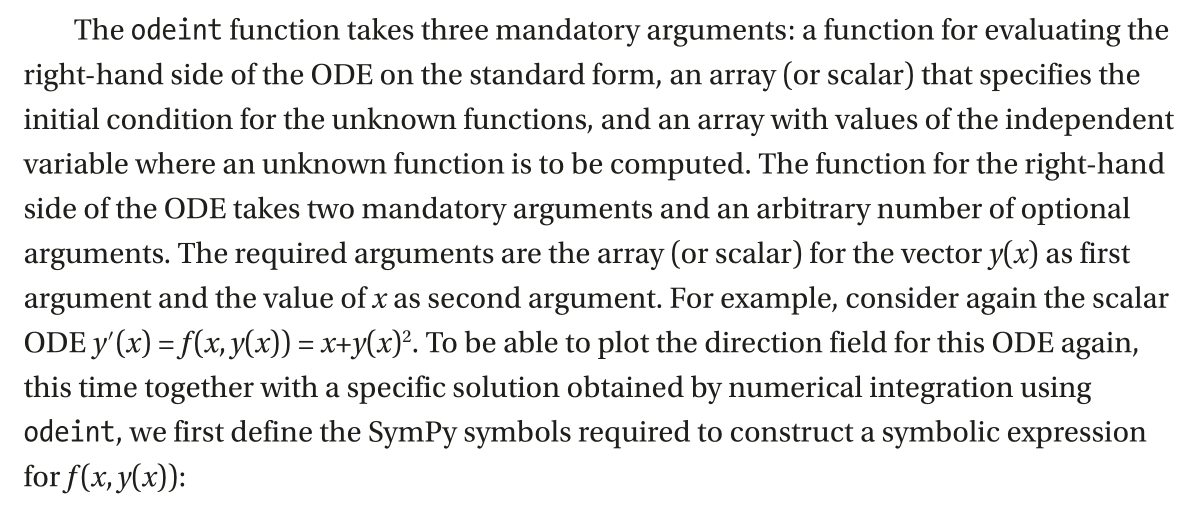

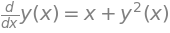

In [3]:
x = sympy.symbols("x")
y = sympy.Function("y")

f = y(x)**2 + x

sympy.Eq(y(x).diff(x), f)

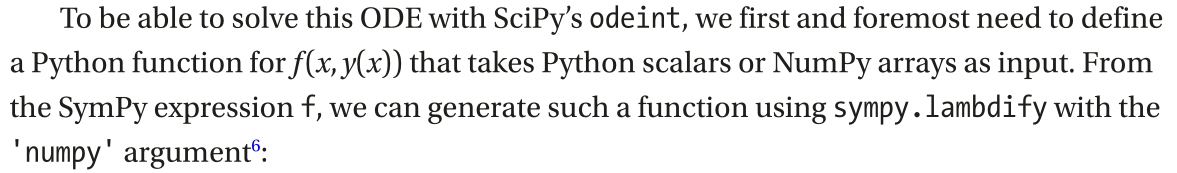

In [4]:
f_np = sympy.lambdify((y(x), x), f, 'numpy')

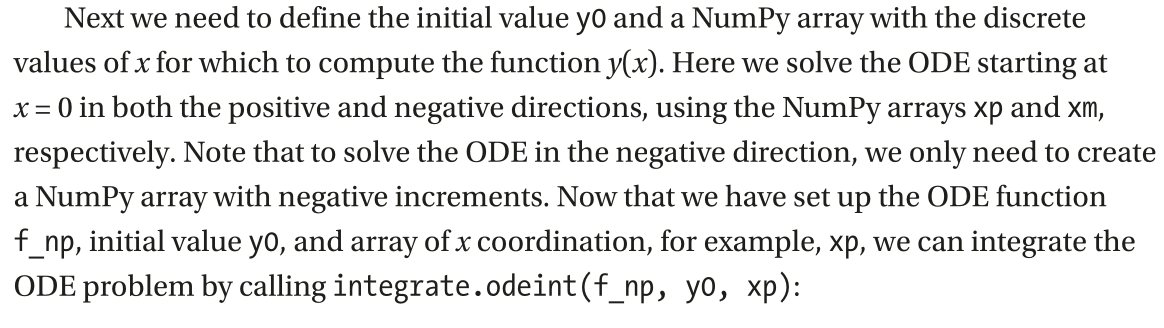

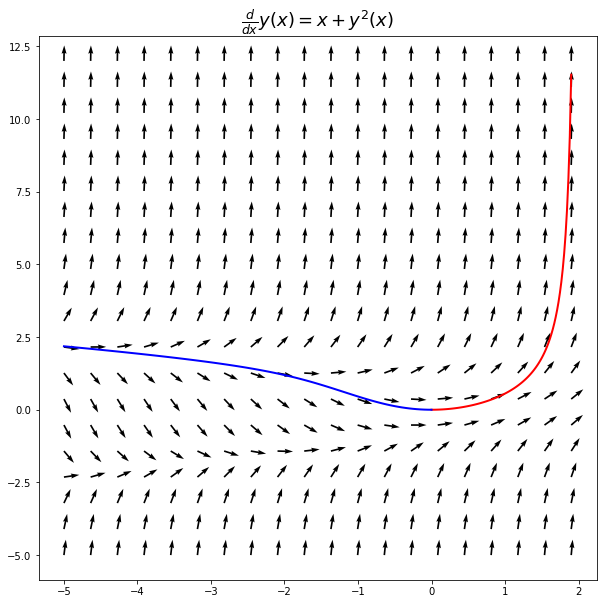

In [5]:
y0 = 0

# Positive part
xp = np.linspace(0, 1.9, 100)
yp = integrate.odeint(f_np, y0, xp)

# Negative part
xm = np.linspace(0, -5, 100)
ym = integrate.odeint(f_np, y0, xm)

fig, ax = plt.subplots(1, 1, figsize=(10, 10))
plot_direction_field(x, y(x), f, x_lim=(-5, 1.9), y_lim=(-5, 12), ax=ax)

ax.plot(xp, yp, 'r', lw=2)
ax.plot(xm, ym, 'b', lw=2)

> The direction field of the ODE $y′(x) = x+y(x)^2$ and the specific solution
that satisfies $y(0) = 0$

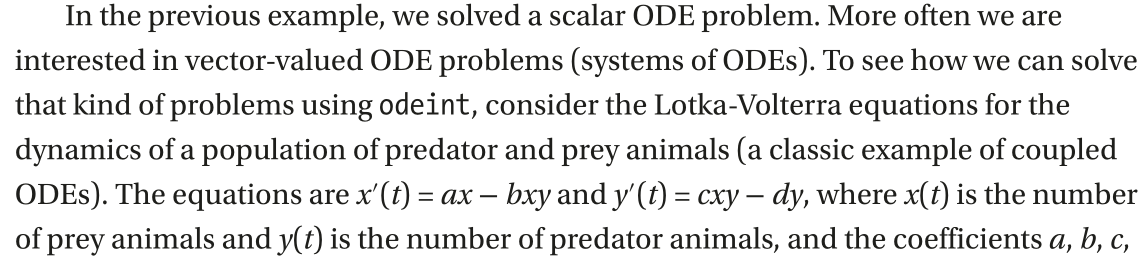

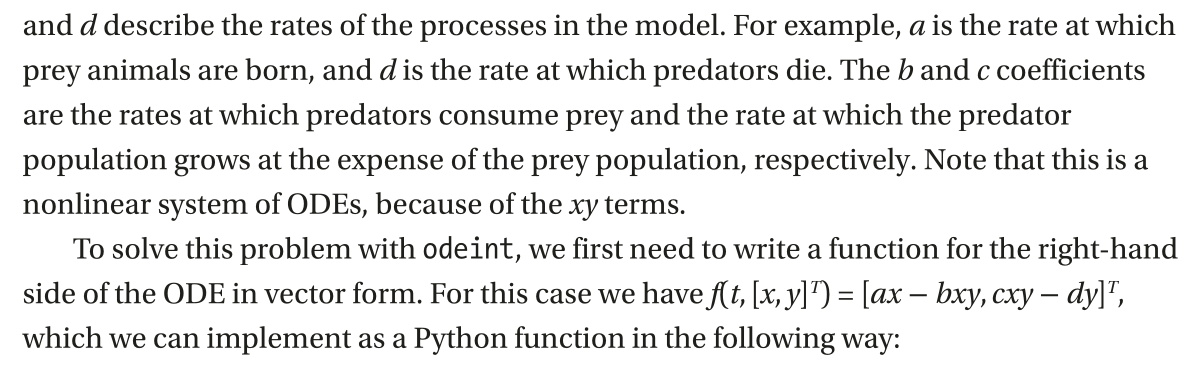

In [6]:
a, b, c, d = 0.4, 0.002, 0.001, 0.7

def f(xy, t):
    x, y = xy
    return [a * x - b * x * y, c * x * y - d * y]

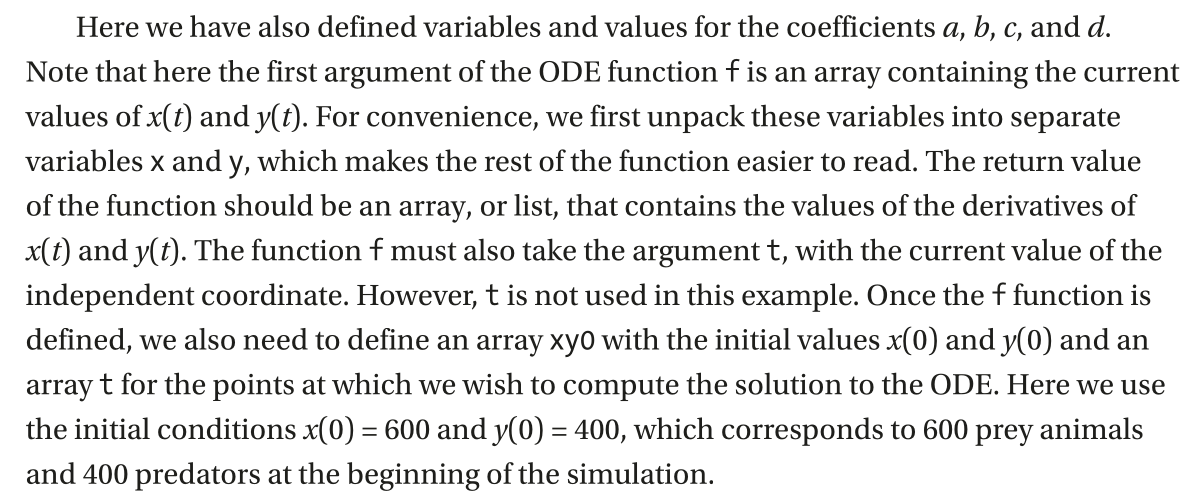

In [7]:
xy0 = [600, 400]
t = np.linspace(0, 50, 250)

xy_t = integrate.odeint(f, xy0, t)
xy_t.shape

Text(0, 0.5, 'Number of predators')

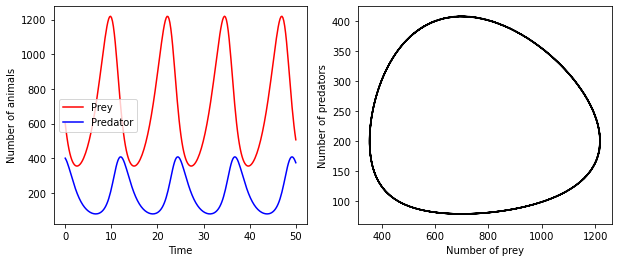

In [8]:
fig, axes = plt.subplots(1, 2, figsize=(10, 4))

# Time space
axes[0].plot(t, xy_t[:,0], 'r', label="Prey")
axes[0].plot(t, xy_t[:,1], 'b', label="Predator")
axes[0].set_xlabel("Time")
axes[0].set_ylabel("Number of animals")
axes[0].legend()

# Phase space
axes[1].plot(xy_t[:,0], xy_t[:,1], 'k')
axes[1].set_xlabel("Number of prey")
axes[1].set_ylabel("Number of predators")

> A solution to the Lotka-Volterra ODE for predator-prey populations,
as a function of time (left) and in phase space (right)

[Lorenz system](https://en.wikipedia.org/wiki/Lorenz_system)

> The Lorenz system is a system of ordinary differential equations first studied by mathematician and meteorologist Edward Lorenz. It is notable for having chaotic solutions for certain parameter values and initial conditions. In particular, the Lorenz attractor is a set of chaotic solutions of the Lorenz system. In popular media the "butterfly effect" stems from the real-world implications of the Lorenz attractor, i.e. that in any physical system, in the absence of perfect knowledge of the initial conditions (even the minuscule disturbance of the air due to a butterfly flapping its wings), our ability to predict its future course will always fail. This underscores that physical systems can be completely deterministic and yet still be inherently unpredictable even in the absence of quantum effects. The shape of the Lorenz attractor itself, when plotted graphically, may also be seen to resemble a butterfly.

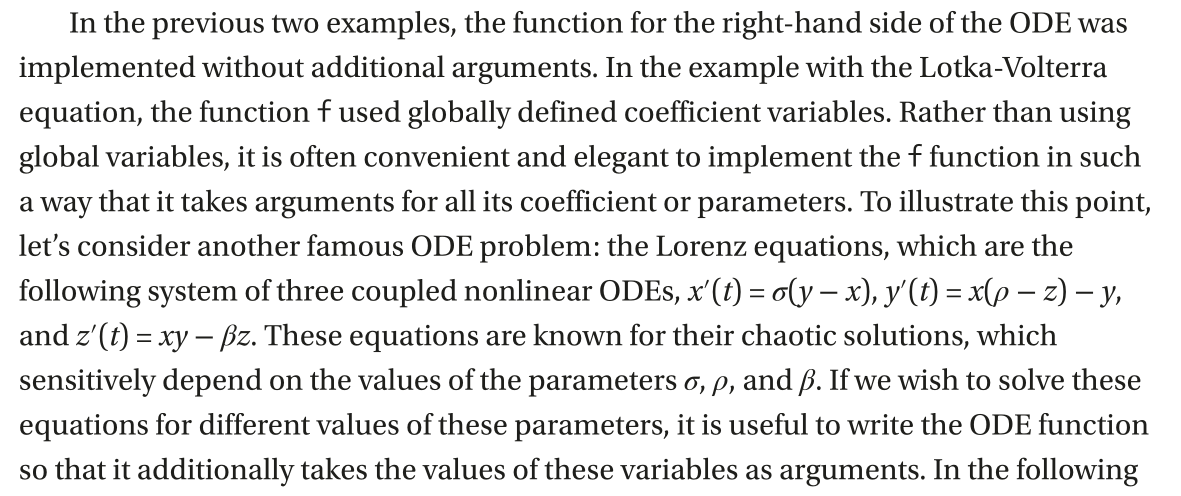

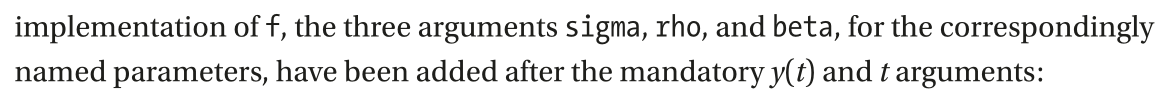

In [9]:
def f(xyz, t, sigma, rho, beta):
    x, y, z = xyz
    return [sigma * (y - x), x * (rho - z) - y, x * y - beta * z]

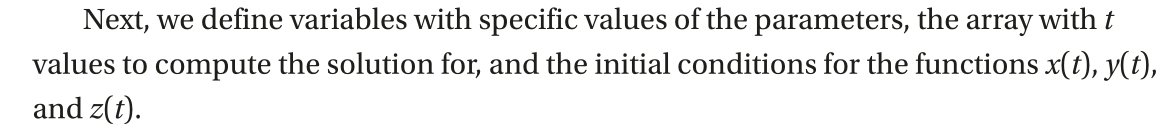

In [11]:
sigma, rho, beta = 8, 28, 8/3.0
t = np.linspace(0, 25, 10000)
xyz0 = [1.0, 1.0, 1.0]

This time when we call `integrate.odeint`, we need to also specify the args
argument, which needs to be a list, tuple, or array with the same number of elements
as the number of additional arguments in the `f` function we defined in the preceding
section. In this case there are three parameters, and we pass a tuple with the values
of these parameters via the args argument when calling `integrate.odeint`. In the
following we solve the ODE for three different sets of parameters (but the same initial
conditions)

In [12]:
xyz1 = integrate.odeint(f, xyz0, t, args=(sigma, rho, beta))

xyz2 = integrate.odeint(f, xyz0, t, args=(sigma, rho, 0.6*beta))

xyz3 = integrate.odeint(f, xyz0, t, args=(2*sigma, rho, 0.6*beta))

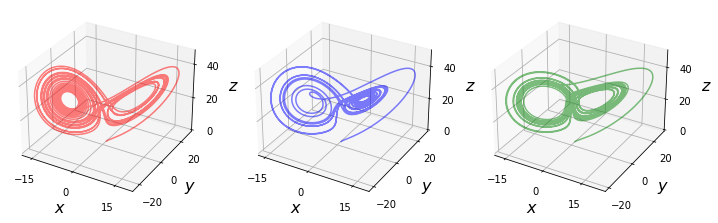

In [14]:
from mpl_toolkits.mplot3d.axes3d import Axes3D

fig, (ax1, ax2, ax3) = plt.subplots(1, 3, figsize=(12, 4), subplot_kw={'projection':'3d'})

for ax, xyz, c in [(ax1, xyz1, 'r'), (ax2, xyz2, 'b'), (ax3, xyz3, 'g')]:
    ax.plot(xyz[:,0], xyz[:,1], xyz[:,2], c, alpha=0.5)
    ax.set_xlabel('$x$', fontsize=16)
    ax.set_ylabel('$y$', fontsize=16)
    ax.set_zlabel('$z$', fontsize=16)
    ax.set_xticks([-15, 0, 15])
    ax.set_yticks([-20, 0, 20])
    ax.set_zticks([0, 20, 40])

> The dynamics for the Lorenz ODE, for three different sets of
parameters